In [65]:
import numpy as np
# Plotting libraries
import matplotlib.pylab as plt
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline
# This enables high resolution PNGs.
%config InlineBackend.figure_formats = {'png', 'svg'}

In [66]:
from egttools.analytical import replicator_equation
from egttools.utils import find_saddle_type_and_gradient_direction
from egttools.plotting import plot_gradient

In [71]:
nb_points = 101
strategy_i = np.linspace(0, 1, num=nb_points, dtype=np.float64)
strategy_j = 1 - strategy_i
states = np.array((strategy_i,strategy_j)).T

# Payoff matrix
T = 4
R = 3
P = 2
S = 1
M = 51
N = 100
A = np.array([
        [(M/N) * R, (M/N) * S],
        [(M/N) * T, P],
    ])

def prisoner_payoff(T, R , P , S , M ,N):
    if(M < N/2):
        return np.array([
        [P,P],
        [P, P],
    ])
    else:
        return np.array([
                [(M/N) * R, (M/N) * S],
                [(M/N) * T, P],
    ])
A = prisoner_payoff(T, R , P , S , M ,N)   

In [72]:
# Calculate gradient
G = np.array([replicator_equation(states[i], A)[0] for i in range(len(states))])

In [73]:
# Find saddle points (where the gradient is 0)
epsilon = 1e-7
saddle_points_idx = np.where((G <= epsilon) & (G >= -epsilon))[0]
saddle_points = saddle_points_idx / (nb_points - 1)

# Now let's find which saddle points are absorbing/stable and which aren't
# we also annotate the gradient's direction among saddle poinst
saddle_type, gradient_direction = find_saddle_type_and_gradient_direction(G, saddle_points_idx)

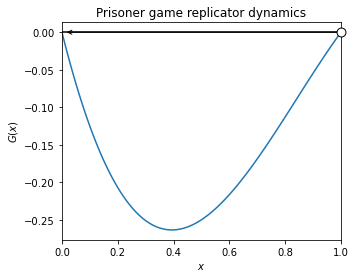

In [74]:
ax = plot_gradient(strategy_i,
                   G,
                   saddle_points,
                   saddle_type,
                   gradient_direction,
                   'Prisoner game replicator dynamics',
                   xlabel='$x$')
plt.show()